# Diabitis Dectition

Perxeptron Model

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [16]:
data =pd.read_csv('/content/diabetes.csv')
print(data.shape)
print(data.head(10))

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     

In [14]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


<Axes: xlabel='Outcome'>

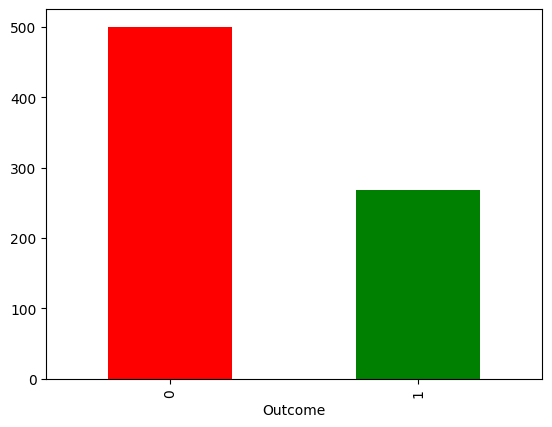

In [20]:
data['Outcome'].value_counts().plot(kind='bar',color=['red','green'])


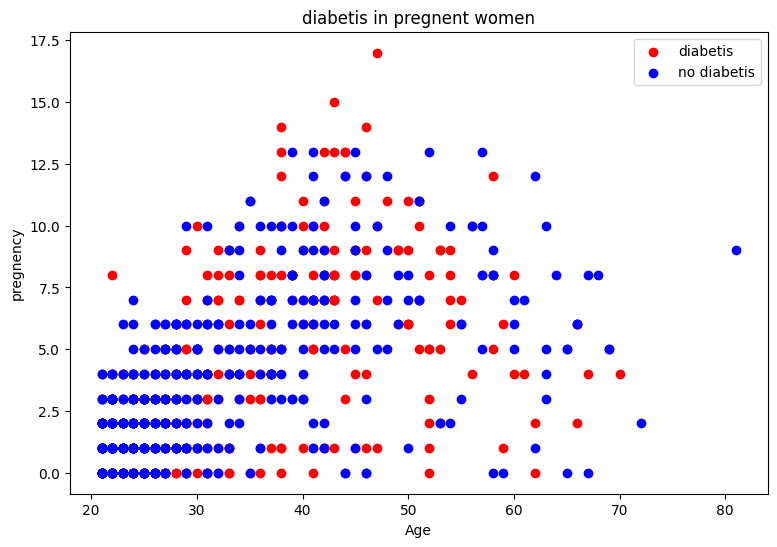

In [29]:
plt.figure(figsize=(9,6))
df=data

#positive class
plt.scatter(df.Age[df.Outcome==1],df.Pregnancies[df.Outcome==1],color='red')
#negative Classes
plt.scatter(df.Age[df.Outcome==0],df.Pregnancies[df.Outcome==0],color='blue')

plt.title('diabetis in pregnent women')
plt.xlabel('Age')
plt.ylabel("pregnency")
plt.legend(['diabetis','no diabetis'])


In [36]:
from sklearn.model_selection import train_test_split
x=data.drop('Outcome',axis=1)
print(x.shape)
print(x.head(10))
y=data[['Outcome']]
print(y.shape)
print(y.head(20))
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=7)

(768, 8)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2

In [33]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (537, 8)
x_test (231, 8)
y_train (537, 1)
y_test (231, 1)


In [37]:
#normalization
#2 types StandartScaller and MinMax , there are many but now we r using these to to train

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
print('x_train',x_train[:5])
x_test=sc.fit_transform(x_test)
print('x_test',x_test[:5])
print('x_train=',x_train.shape)
print('x_test=',x_test.shape)

x_train [[ 2.21124332 -0.25635346  0.80035334  1.22350138 -0.6983268   1.85869458
   1.38157439  1.06697501]
 [-0.53604176  0.05182162  0.0681732   0.72424588  0.16791698  0.87654509
   1.26457779 -0.84406847]
 [ 0.07446603 -0.62616354 -0.03642397  1.09868751 -0.6983268   0.07296823
  -0.95835763  0.02458766]
 [ 0.37971993 -0.25635346  0.17277036  0.47461813 -0.6983268  -1.06224353
  -0.17238047 -0.49660602]
 [-0.53604176 -0.81106859 -0.24561829  0.72424588  0.76061009  0.73623802
   0.62859626 -0.84406847]]
x_test [[-0.85673659 -1.13488396 -0.40652142 -0.56310259 -0.34936579 -0.53454225
   0.27946728 -0.85679502]
 [ 0.82757109  1.85351586  0.70360317  0.00852353  0.82642585  0.56086874
   0.29791652  1.35505536]
 [ 2.51187878  0.90116866  1.00636442  0.77069167 -0.45984285 -0.58490597
   0.74377299  0.69969229]
 [ 0.54685314 -1.03636529 -1.01204392  0.58014964 -0.18365019 -0.34567829
  -0.4093041  -0.9387154 ]
 [ 0.54685314  0.01450058  0.40084192  0.64366365 -0.68868821 -0.48417853
 

In [44]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [45]:
def cost_compute(y,y_hat):
  cost=-np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
  return cost

In [63]:
def stochastic(x, y):
    w = np.zeros(shape=(1, x.shape[1])) #weight
    print("Initial Weights")
    print(w)
    print("Initial bias")
    b = 0 #bias
    print(b)

    learning_rate = 0.01
    m = len(y)
    iterations = 40
    cost_list = []

    for i in range(iterations):
        for j in range(m):
            # Forward Propagation
            prediction = sigmoid(np.dot(w, x[j]) + b)

            # Computing Loss Value
            loss_value = cost_compute(y[j], prediction)

            # Gradients Calculation
            w_gradient = -x[j] * (y[j] - (prediction))
            b_gradient = -(y[j] - (prediction))

            # Parameters Update
            w = w - learning_rate * w_gradient
            b = b - learning_rate * b_gradient
            cost_list.append(loss_value)

    return w, b, cost_list


In [64]:
def predict(x,w,bias):
  y_pred=[]
  for i in range(len(x)):
    y=np.asscalar(sigmoid(np.dot(w,x[i])+bias))
    if y>=0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return np.array(y_pred)


In [65]:
w,b,cost_list=stochastic(x_train,y_train)
print('w=',w)
print('bias=',b)
print('len of cost=',len(cost_list))


Initial Weights
[[0. 0. 0. 0. 0. 0. 0. 0.]]
Initial bias
0


KeyError: 0